## Getting and Reading Input and Output Signals

In [ ]:
import numpy as np
from scipy.signal import correlate, convolve

# Function to read a signal from a text file
def read_signal(file_path):
    with open(file_path, 'r') as file:
        signal = file.read().splitlines()
        signal = np.array([float(value) for value in signal])
    return signal

# Get file paths for input and output signals
input_file_path = "/content/INPUT-SIGNAL-X(t).txt"
output_file_path = "/content/OUTPUT-SIGNAL-Y(t).txt"

# Read input and output signals from text files
input_signal = read_signal(input_file_path)
output_signal = read_signal(output_file_path)



## Plotting Input and Output Signals

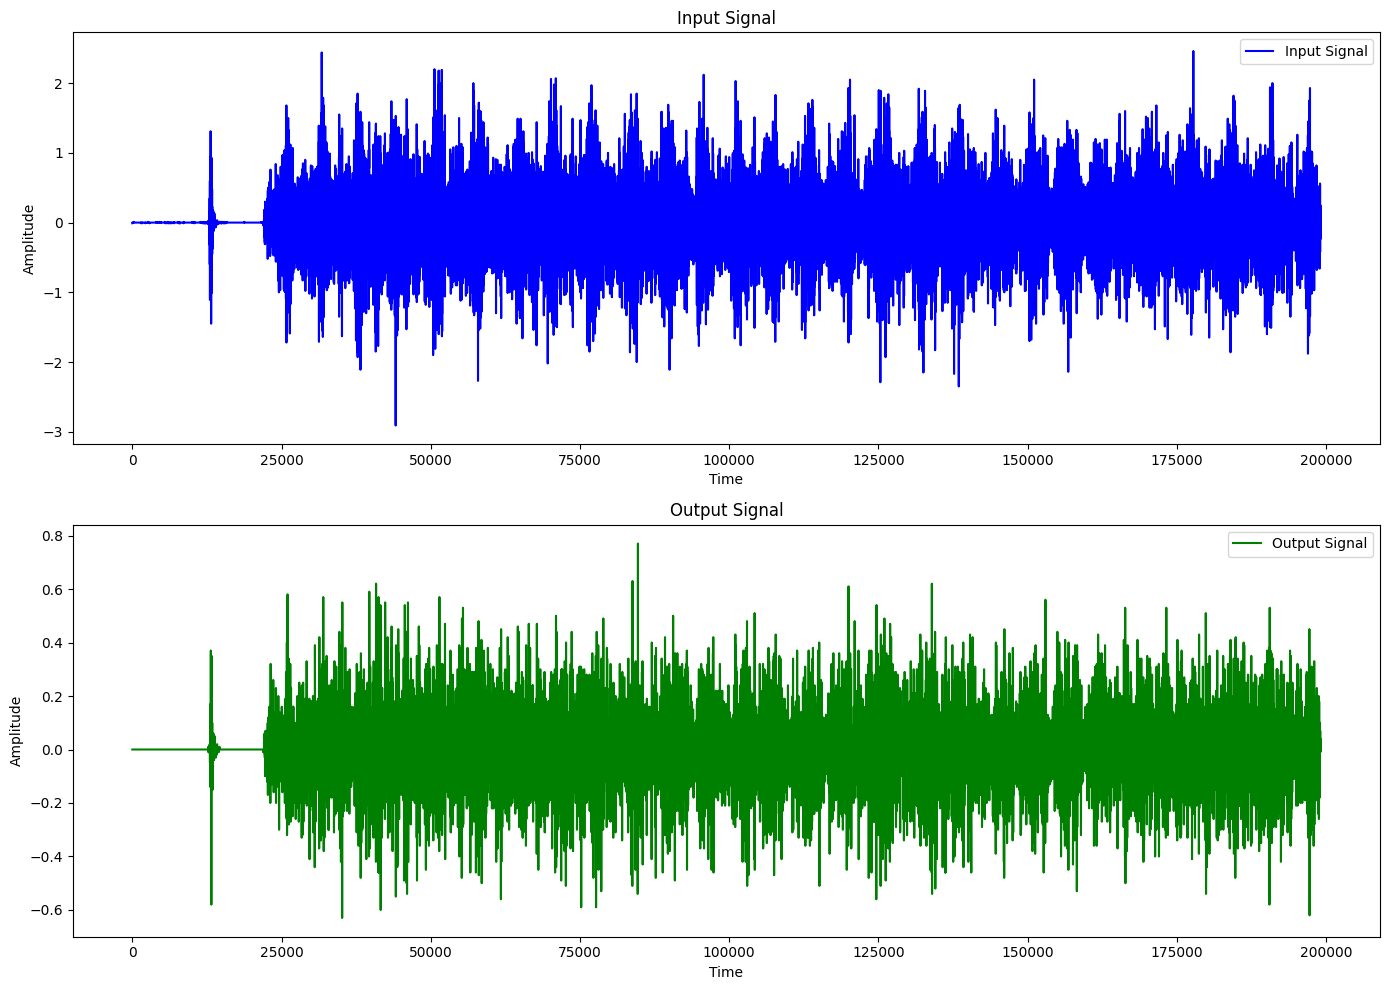

In [ ]:
import matplotlib.pyplot as plt

# Plot signals and analysis results
plt.figure(figsize=(14, 10))

# Plot input signal
plt.subplot(2, 1, 1)
plt.plot(input_signal, label='Input Signal',color='blue')
plt.title('Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot output signal
plt.subplot(2, 1, 2)
plt.plot(output_signal, label='Output Signal',color='green')
plt.title('Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# **METHOD 1**

## Apply Low Pass Filter to Input Signal and Cross Correlate with Output Signal

---



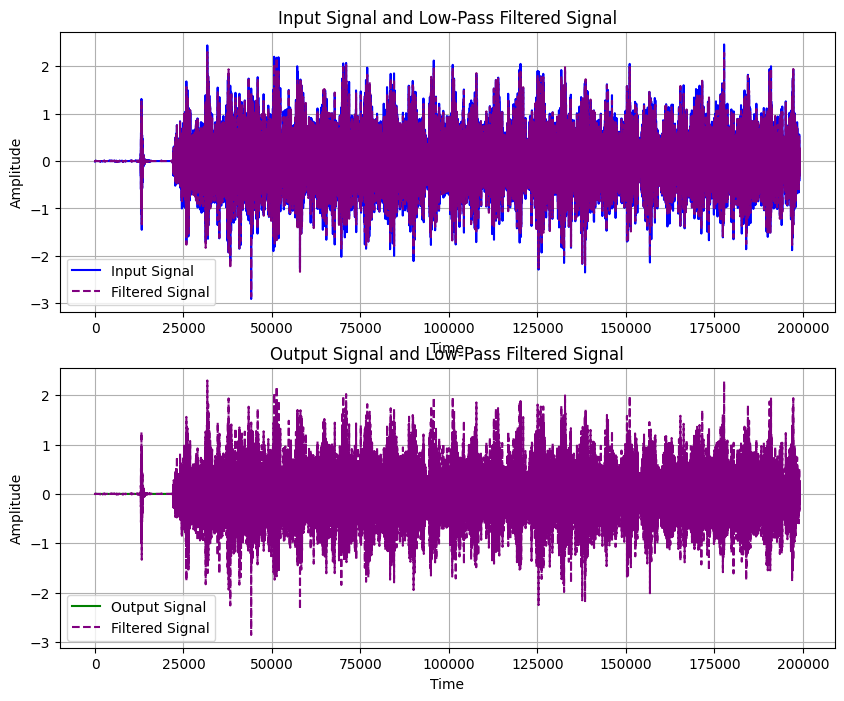

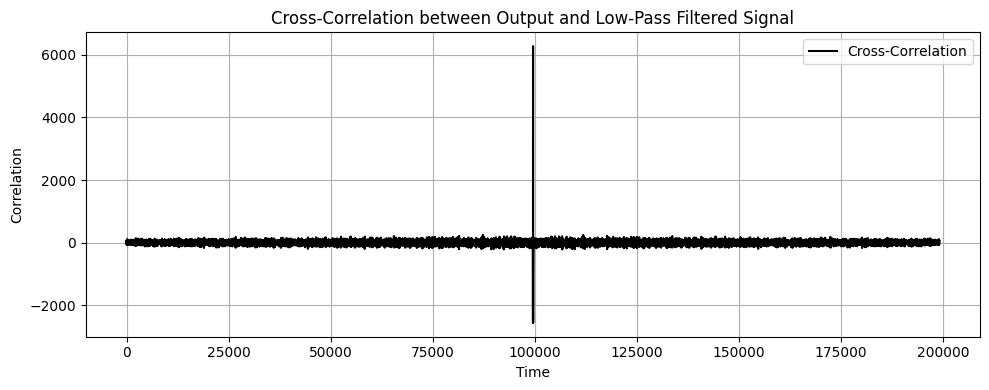

Low Pass Cross Correlation: 6275.833452878105


In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, correlate

# Function to apply a low-pass filter on an input signal
def apply_low_pass_filter(input_signal, cutoff_frequency, sampling_frequency, filter_order=4):
    nyquist_frequency = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(filter_order, normal_cutoff, btype='low', analog=False)
    filtered_signal = lfilter(b, a, input_signal)
    return filtered_signal

# Example usage
# input_signal = np.random.rand(1000)  # Example input signal
lp_cutoff_frequency = 100  # Cutoff frequency in Hz
lp_sampling_frequency = 1000  # Sampling frequency in Hz
lp_filtered_signal = apply_low_pass_filter(input_signal, lp_cutoff_frequency, lp_sampling_frequency)

# Plotting the signals (example)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot Input Signal and Low-Pass Filtered Signal
plt.subplot(2, 1, 1)
plt.plot(input_signal, label='Input Signal',color='blue')
plt.plot(lp_filtered_signal, label='Filtered Signal', linestyle='--',color='purple')
plt.title('Input Signal and Low-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot Output Signal and Low-Pass Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(output_signal, label='Output Signal',color='green')
plt.plot(lp_filtered_signal, label='Filtered Signal', linestyle='--',color = 'purple')
plt.title('Output Signal and Low-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Calculate and plot cross-correlation
lp_correlation = correlate(output_signal, lp_filtered_signal, mode='same')
plt.figure(figsize=(10, 4))
plt.plot(lp_correlation, label='Cross-Correlation',color='black')
plt.title('Cross-Correlation between Output and Low-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Low Pass Cross Correlation: {np.max(lp_correlation)}")

## Apply High Pass Filter to Input Signal and Cross Correlate with Output Signal

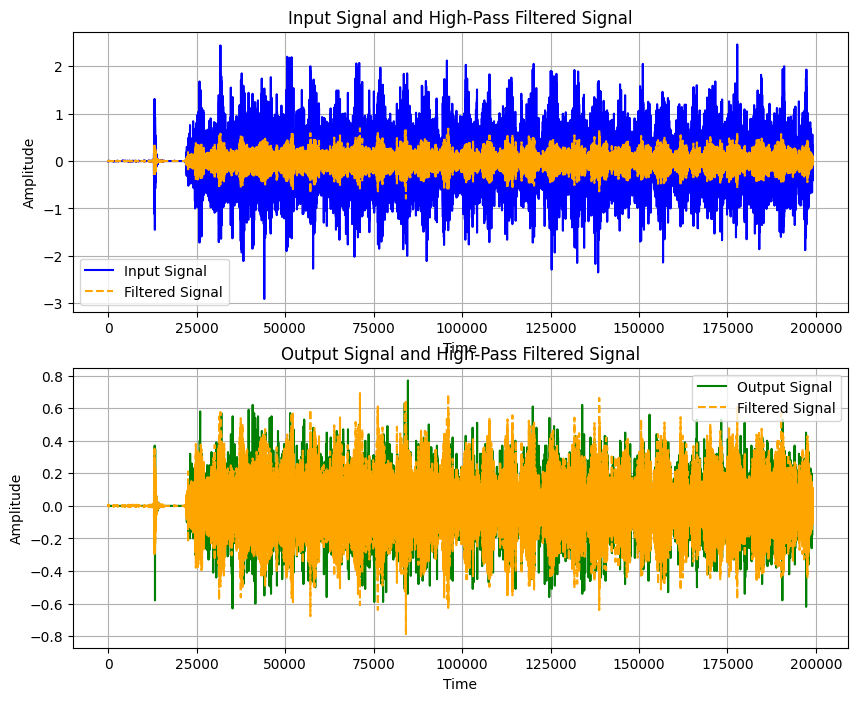

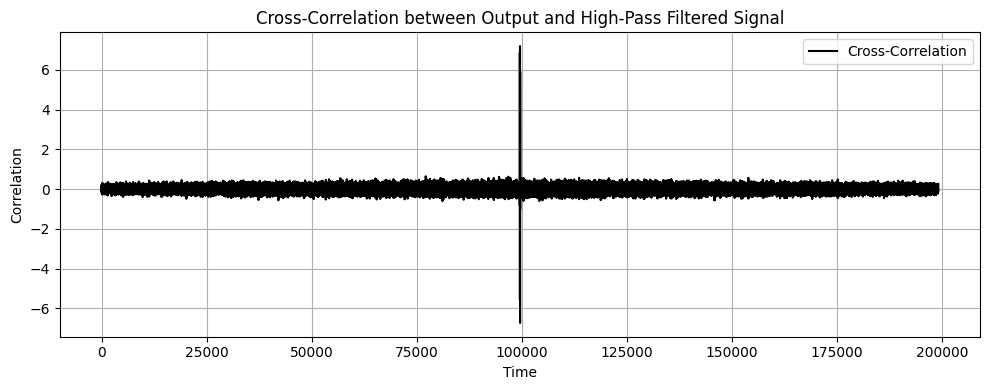

High Pass Cross Correlation: 7.186982870710705


In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, correlate

# Function to apply a high-pass filter on an input signal
def apply_high_pass_filter(input_signal, cutoff_frequency, sampling_frequency, filter_order=4):
    nyquist_frequency = 0.5 * sampling_frequency
    normal_cutoff = cutoff_frequency / nyquist_frequency
    b, a = butter(filter_order, normal_cutoff, btype='high', analog=False)
    filtered_signal = lfilter(b, a, input_signal)
    return filtered_signal

# Example usage
# input_signal = np.random.rand(1000)  # Example input signal
hp_cutoff_frequency = 100  # Cutoff frequency in Hz
hp_sampling_frequency = 1000  # Sampling frequency in Hz
hp_filtered_signal = apply_high_pass_filter(input_signal, hp_cutoff_frequency, hp_sampling_frequency)

# Plotting the signals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot Input Signal and High-Pass Filtered Signal
plt.subplot(2, 1, 1)
plt.plot(input_signal, label='Input Signal', color='blue')
plt.plot(hp_filtered_signal, label='Filtered Signal', linestyle='--', color='orange')
plt.title('Input Signal and High-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot Output Signal and High-Pass Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(output_signal, label='Output Signal', color='green')
plt.plot(hp_filtered_signal, label='Filtered Signal', linestyle='--', color='orange')
plt.title('Output Signal and High-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Calculate and plot cross-correlation
hp_correlation = correlate(output_signal, hp_filtered_signal, mode='same')
plt.figure(figsize=(10, 4))
plt.plot(hp_correlation, label='Cross-Correlation', color='black')
plt.title('Cross-Correlation between Output and High-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"High Pass Cross Correlation: {np.max(hp_correlation)}")


## Apply Band Pass Filter to Input Signal and Cross Correlate with Output Signal



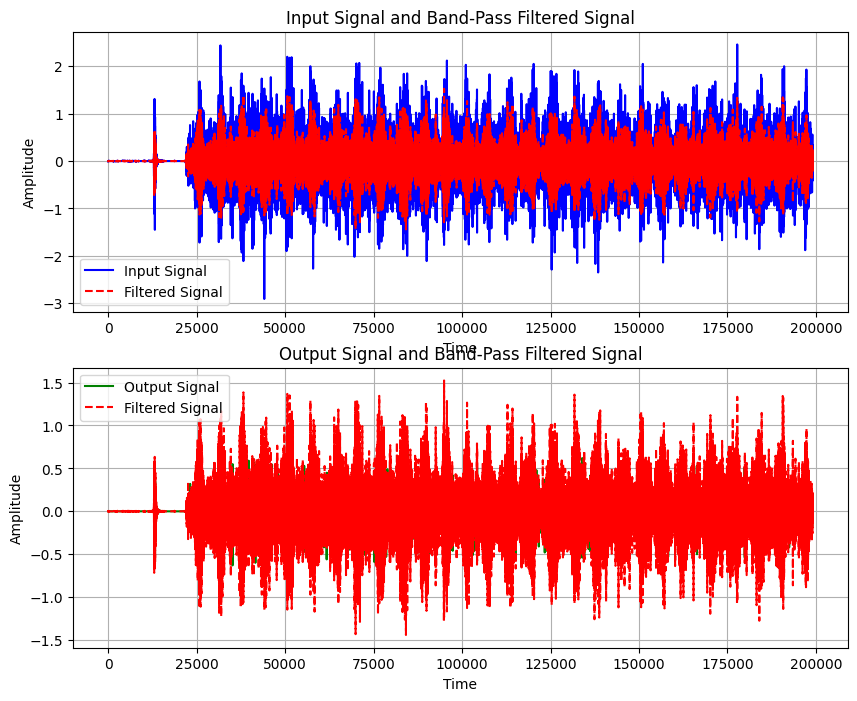

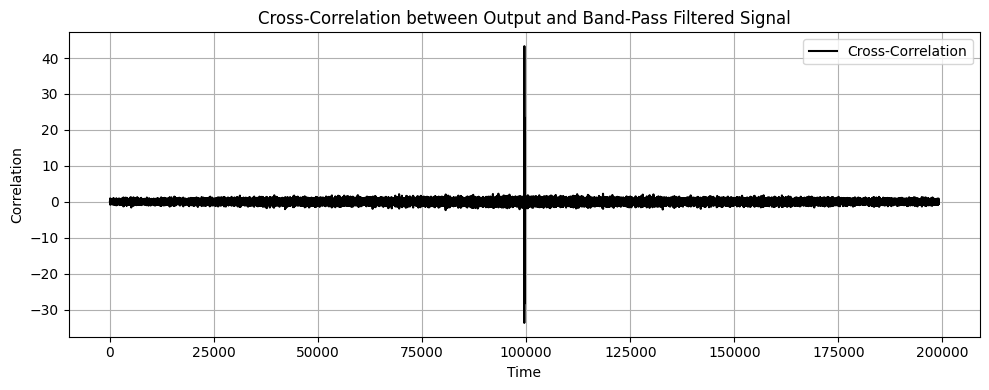

Band Pass Cross Correlation: 43.30881219530758


In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, correlate

# Function to apply a band-pass filter on an input signal
def apply_band_pass_filter(input_signal, low_cutoff_frequency, high_cutoff_frequency, sampling_frequency, filter_order=4):
    nyquist_frequency = 0.5 * sampling_frequency
    low_normal_cutoff = low_cutoff_frequency / nyquist_frequency
    high_normal_cutoff = high_cutoff_frequency / nyquist_frequency
    b, a = butter(filter_order, [low_normal_cutoff, high_normal_cutoff], btype='band', analog=False)
    filtered_signal = lfilter(b, a, input_signal)
    return filtered_signal

# Example usage
# input_signal = np.random.rand(1000)  # Example input signal
bp_low_cutoff_frequency = 50  # Low cutoff frequency in Hz
bp_high_cutoff_frequency = 150  # High cutoff frequency in Hz
bp_sampling_frequency = 1000  # Sampling frequency in Hz
bp_filtered_signal = apply_band_pass_filter(input_signal, bp_low_cutoff_frequency, bp_high_cutoff_frequency, bp_sampling_frequency)

# Plotting the signals
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot Input Signal and Band-Pass Filtered Signal
plt.subplot(2, 1, 1)
plt.plot(input_signal, label='Input Signal', color='blue')
plt.plot(bp_filtered_signal, label='Filtered Signal', linestyle='--', color='red')
plt.title('Input Signal and Band-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Plot Output Signal and Band-Pass Filtered Signal
plt.subplot(2, 1, 2)
plt.plot(output_signal, label='Output Signal', color='green')
plt.plot(bp_filtered_signal, label='Filtered Signal', linestyle='--', color='red')
plt.title('Output Signal and Band-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# Calculate and plot cross-correlation
bp_correlation = correlate(output_signal, bp_filtered_signal, mode='same')
plt.figure(figsize=(10, 4))
plt.plot(bp_correlation, label='Cross-Correlation', color='black')
plt.title('Cross-Correlation between Output and Band-Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Band Pass Cross Correlation: {np.max(bp_correlation)}")


In [ ]:
print("Correlation results:")
print(f"Low Pass: {np.max(lp_correlation)}")
print(f"High Pass: {np.max(hp_correlation)}")
print(f"Band Pass: {np.max(bp_correlation)}")

Correlation results:
Low Pass: 6275.833452878105
High Pass: 7.186982870710705
Band Pass: 43.30881219530758


In [ ]:
# Identify the best matching filter based on correlation results
best_filter = None
max_correlation = max(np.max(lp_correlation), np.max(hp_correlation), np.max(bp_correlation))
if max_correlation == np.max(lp_correlation):
    best_filter = "Low Pass"
elif max_correlation == np.max(hp_correlation):
    best_filter = "High Pass"
else:
    best_filter = "Band Pass"

# Print analysis results
print("Analysis Results:")
print(f"Best matching filter: {best_filter}")

Analysis Results:
Best matching filter: Low Pass


In [ ]:
# Compute mean correlations
mean_lp_correlation = np.mean(lp_correlation)
mean_hp_correlation = np.mean(hp_correlation)
mean_bp_correlation = np.mean(bp_correlation)

# Print mean correlation results
print("Mean Correlation results:")
print(f"Low Pass: {mean_lp_correlation}")
print(f"High Pass: {mean_hp_correlation}")
print(f"Band Pass: {mean_bp_correlation}")

# Identify the best matching filter based on mean correlation results
best_filter = None
max_mean_correlation = max(mean_lp_correlation, mean_hp_correlation, mean_bp_correlation)
if max_mean_correlation == mean_lp_correlation:
    best_filter = "Low Pass"
elif max_mean_correlation == mean_hp_correlation:
    best_filter = "High Pass"
else:
    best_filter = "Band Pass"

# Print analysis results
print("Analysis Results:")
print(f"Best matching filter based on mean correlation: {best_filter}")


Mean Correlation results:
Low Pass: 0.006234604278961365
High Pass: 0.0031330747939135794
Band Pass: -0.00621787639337507
Analysis Results:
Best matching filter based on mean correlation: Low Pass


# **METHOD 2**

## Define Filter Kernels and Convolve Input Signal with Filters

In [ ]:
# Define filter kernels
hlp = np.array([0.1, 0.8, 0.1])  # low-pass filter kernel
hhp = np.array([-1, 2.5, -1])    #  high-pass filter kernel
hbp = np.array([-1, 1, -1, 1, -1])  #  band-pass filter kernel

# Function to convolve filters with input signal
def apply_filter(input_signal, kernel):
    return convolve(input_signal, kernel, mode='same')

# Apply filters to input signal
lp_filtered_signal = apply_filter(input_signal, hlp)
hp_filtered_signal = apply_filter(input_signal, hhp)
bp_filtered_signal = apply_filter(input_signal, hbp)


## Plotting Low Pass , High Pass & Band Pass Filtered Signals

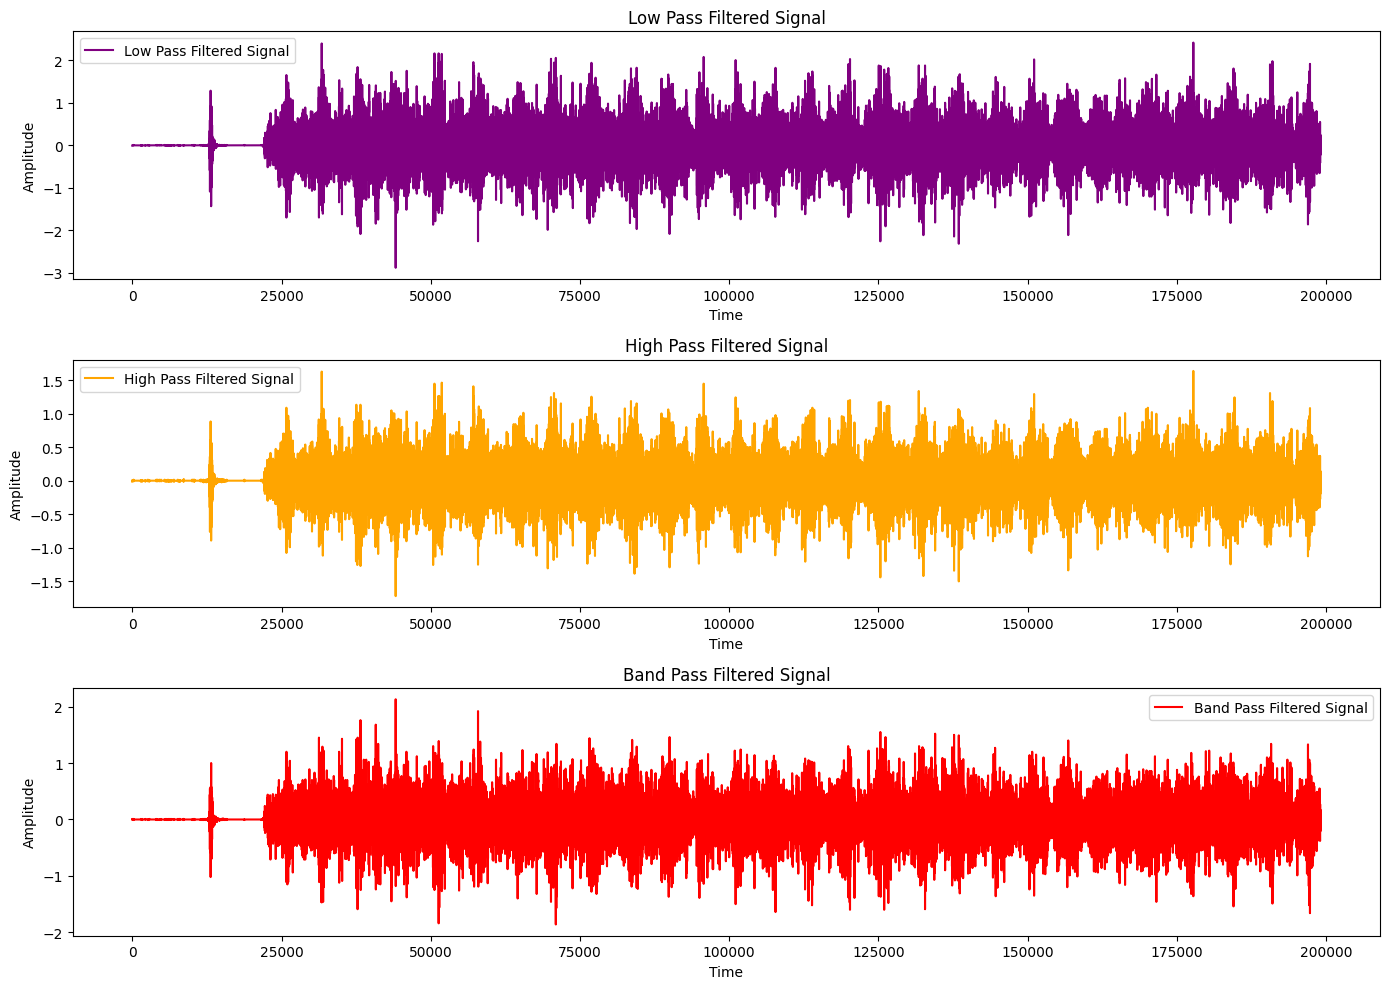

In [ ]:
import matplotlib.pyplot as plt

# Plot signals and analysis results
plt.figure(figsize=(14, 10))

# Plot Low Pass Filtered Signal
plt.subplot(3, 1, 1)
plt.plot(lp_filtered_signal, label='Low Pass Filtered Signal', color='purple')
plt.title('Low Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot High Pass Filtered Signal
plt.subplot(3, 1, 2)
plt.plot(hp_filtered_signal, label='High Pass Filtered Signal', color='orange')
plt.title('High Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot Band Pass Filtered Signal
plt.subplot(3, 1, 3)
plt.plot(bp_filtered_signal, label='Band Pass Filtered Signal', color='red')
plt.title('Band Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Compute Correlations of These Filtered signals with Output Signal

In [ ]:
# Compute correlations between filtered outputs and output signal
lp_correlation = correlate(lp_filtered_signal, output_signal, mode='same')
hp_correlation = correlate(hp_filtered_signal, output_signal, mode='same')
bp_correlation = correlate(bp_filtered_signal, output_signal, mode='same')

In [ ]:

print("Max Correlation results:")
print(f"Low Pass: {np.max(lp_correlation)}")
print(f"High Pass: {np.max(hp_correlation)}")
print(f"Band Pass: {np.max(bp_correlation)}")

Max Correlation results:
Low Pass: 6267.101640000003
High Pass: 3205.5027000000005
Band Pass: 2472.1218000000003


## Identify the best matching filter based on correlation results

# **METHOD 2**

## Define Filter Kernels and Convolve Input Signal with Filters

In [ ]:
# Define filter kernels
hlp = np.array([0.1, 0.8, 0.1])  # low-pass filter kernel
hhp = np.array([-1, 2.5, -1])    #  high-pass filter kernel
hbp = np.array([-1, 1, -1, 1, -1])  #  band-pass filter kernel

# Function to convolve filters with input signal
def apply_filter(input_signal, kernel):
    return convolve(input_signal, kernel, mode='same')

# Apply filters to input signal
lp_filtered_signal = apply_filter(input_signal, hlp)
hp_filtered_signal = apply_filter(input_signal, hhp)
bp_filtered_signal = apply_filter(input_signal, hbp)


## Plotting Low Pass , High Pass & Band Pass Filtered Signals

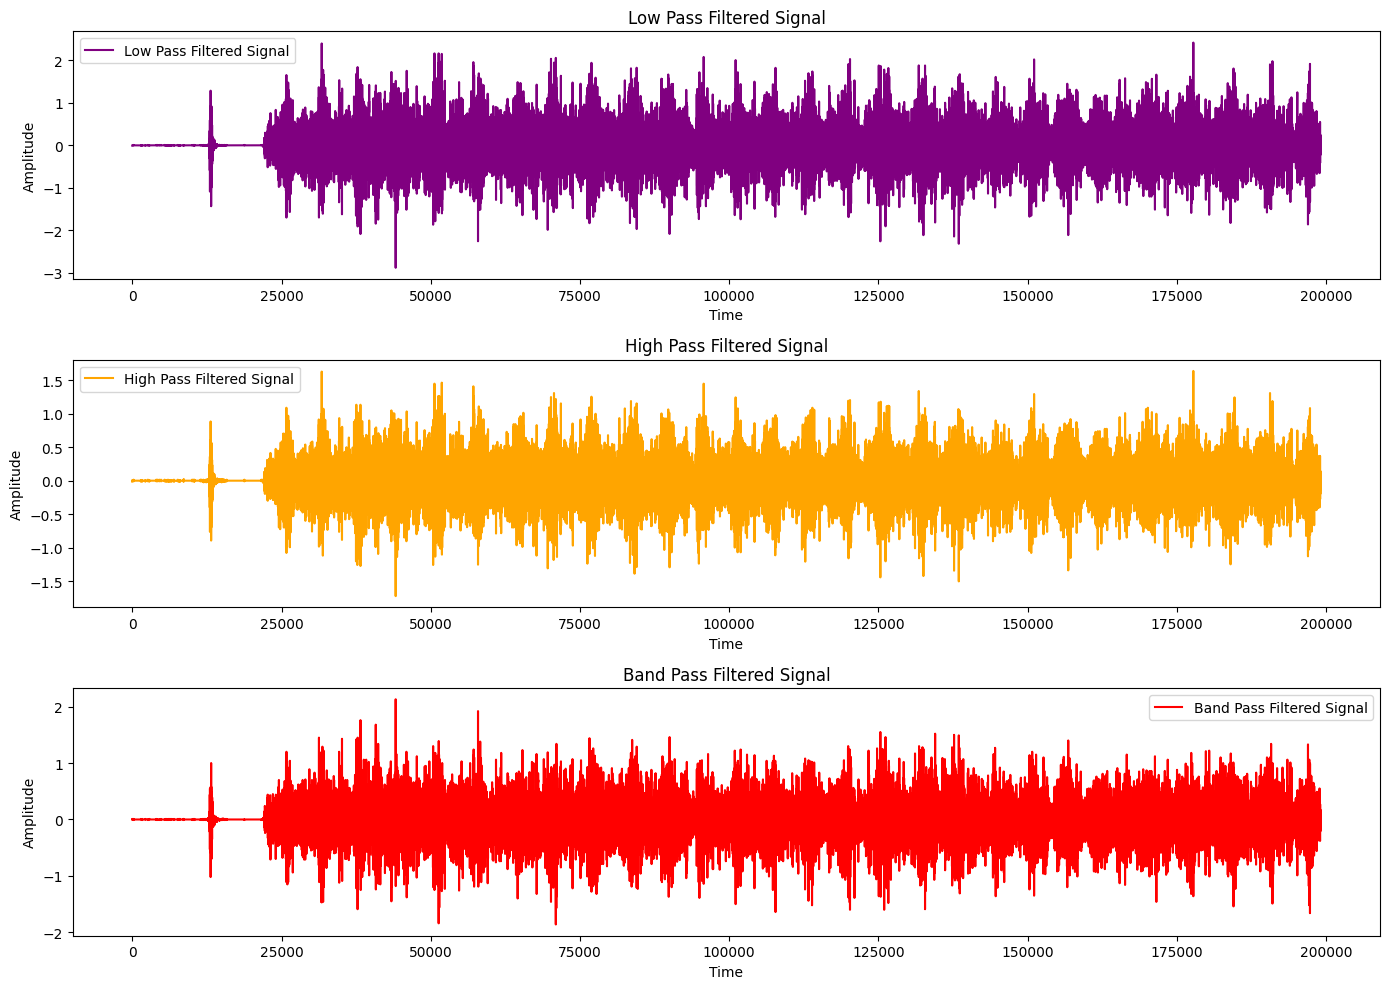

In [ ]:
import matplotlib.pyplot as plt

# Plot signals and analysis results
plt.figure(figsize=(14, 10))

# Plot Low Pass Filtered Signal
plt.subplot(3, 1, 1)
plt.plot(lp_filtered_signal, label='Low Pass Filtered Signal', color='purple')
plt.title('Low Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot High Pass Filtered Signal
plt.subplot(3, 1, 2)
plt.plot(hp_filtered_signal, label='High Pass Filtered Signal', color='orange')
plt.title('High Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot Band Pass Filtered Signal
plt.subplot(3, 1, 3)
plt.plot(bp_filtered_signal, label='Band Pass Filtered Signal', color='red')
plt.title('Band Pass Filtered Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Compute Correlations of These Filtered signals with Output Signal

In [ ]:
# Compute correlations between filtered outputs and output signal
lp_correlation = correlate(lp_filtered_signal, output_signal, mode='same')
hp_correlation = correlate(hp_filtered_signal, output_signal, mode='same')
bp_correlation = correlate(bp_filtered_signal, output_signal, mode='same')

In [ ]:

print("Correlation results:")
print(f"Low Pass: {np.max(lp_correlation)}")
print(f"High Pass: {np.max(hp_correlation)}")
print(f"Band Pass: {np.max(bp_correlation)}")

Correlation results:
Low Pass: 6267.101640000003
High Pass: 3205.5027000000005
Band Pass: 2472.1218000000003


## Identify the best matching filter based on correlation results

In [ ]:
# Identify the best matching filter based on correlation results
best_filter = None
max_correlation = max(np.max(lp_correlation), np.max(hp_correlation), np.max(bp_correlation))
if max_correlation == np.max(lp_correlation):
    best_filter = "Low Pass"
elif max_correlation == np.max(hp_correlation):
    best_filter = "High Pass"
else:
    best_filter = "Band Pass"

# Print analysis results
print("Analysis Results:")
print(f"Best matching filter: {best_filter}")

Analysis Results:
Best matching filter: Low Pass


## Identify the best matching filter based on correlation results

In [ ]:
# Compute mean correlations
mean_lp_correlation = np.mean(lp_correlation)
mean_hp_correlation = np.mean(hp_correlation)
mean_bp_correlation = np.mean(bp_correlation)

# Print mean correlation results
print("Mean Correlation results:")
print(f"Low Pass: {mean_lp_correlation}")
print(f"High Pass: {mean_hp_correlation}")
print(f"Band Pass: {mean_bp_correlation}")

# Identify the best matching filter based on mean correlation results
best_filter = None
max_mean_correlation = max(mean_lp_correlation, mean_hp_correlation, mean_bp_correlation)
if max_mean_correlation == mean_lp_correlation:
    best_filter = "Low Pass"
elif max_mean_correlation == mean_hp_correlation:
    best_filter = "High Pass"
else:
    best_filter = "Band Pass"

# Print analysis results
print("Analysis Results:")
print(f"Best matching filter based on mean correlation: {best_filter}")

Mean Correlation results:
Low Pass: 0.006234604278961365
High Pass: 0.0031330747939135794
Band Pass: -0.00621787639337507
Analysis Results:
Best matching filter based on mean correlation: Low Pass
